 Classification avec des reseaux de neurones entierement connectés

# **1 Classification binaire avec des reseaux de neurones entièrement connectés**

In [ ]:
## 1-1 DATASET


In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.03)
print(X.shape) # affiche (1000, 2)
print(y.shape) # affiche (1000,)


(1000, 2)
(1000,)


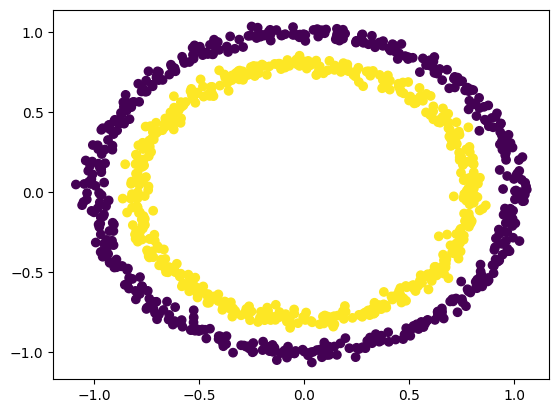

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


In [ ]:
##Ce dataset nécessite une fonction non linéaire pour séparer ses classes, car les échantillons sont générés en forme de cercles
## dans le plan 2D. Une fonction linéaire ne peut pas séparer les deux classes avec précision dans ce cas, car les cercles se chevauchent.
##Il est nécessaire d'utiliser une fonction non linéaire pour séparer les cercles et classer les échantillons correctement.




In [ ]:
import torch

X = torch . from_numpy (X) . type ( torch . float )
y = torch . from_numpy (y) . type ( torch . float )


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
## 1-2 Définition du modèle

In [ ]:
import torch
from torch import nn
device = " cuda " if torch . cuda . is_available () else "cpu"

In [ ]:
class ModelV0 ( nn . Module ):
    def __init__ ( self ) :
       super ().__init__ ()
       # Constructeur pour definir l’ architecture du modele
       self. layer_1 = nn . Linear ( in_features = 2, out_features =5)
       self. layer_2 = nn . Linear ( in_features =5 , out_features =1)

 # Propagation des donnees dans le modele
    def forward ( self , x):
     return self . layer_2 ( self . layer_1 (x ))

In [ ]:
model_0 = ModelV0 () . to ( device )

In [ ]:
print(model_0)



ModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


In [ ]:
loss_fn = nn . BCEWithLogitsLoss ()
optimizer = torch . optim . SGD ( params = model_0 . parameters () , lr =0.1)

In [ ]:
## Entraınement du modele

In [ ]:
def accuracy_fn ( y_true , y_pred ) :    
    correct_predictions = (y_pred == y_true).sum().float()
    total_predictions = y_true.shape[0]
    accuracy = correct_predictions / total_predictions
    return accuracy.item()


In [ ]:
torch . manual_seed (42)

epochs = 100
print_every = 10

# Envoyer le dataset a l appareil d execution
X_train , y_train = X_train . to ( device ) , y_train . to ( device )
X_test , y_test = X_test . to ( device ) , y_test . to ( device )


for epoch in range ( epochs ):
  model_0 . train ()

  y_logits = model_0 ( X_train ). squeeze ()
  y_pred = torch . round ( torch . sigmoid ( y_logits ))

  loss = loss_fn ( y_logits , y_train )
  acc = accuracy_fn ( y_true = y_train , y_pred = y_pred )

  optimizer . zero_grad ()

  loss . backward ()

  optimizer . step ()
  if (epoch+1) % print_every == 0:
        model_0.eval()
        with torch.inference_mode() :

            test_logits = model_0( X_test ).squeeze()
            test_pred = torch.round( torch.sigmoid( test_logits ))
    
            test_loss = loss_fn( test_logits , y_test )
            test_acc = accuracy_fn( y_true = y_test , y_pred = test_pred )
        print(f"Epoch {epoch+1}/{epochs}:")
        print(f"Train loss: {loss:.4f}, Train accuracy: {acc:.4f}")
        print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

Epoch 10/100:
Train loss: 0.6936, Train accuracy: 0.4888
Test loss: 0.6924, Test accuracy: 0.4950
Epoch 20/100:
Train loss: 0.6935, Train accuracy: 0.4875
Test loss: 0.6924, Test accuracy: 0.4900
Epoch 30/100:
Train loss: 0.6935, Train accuracy: 0.4913
Test loss: 0.6925, Test accuracy: 0.4850
Epoch 40/100:
Train loss: 0.6935, Train accuracy: 0.4875
Test loss: 0.6926, Test accuracy: 0.4800
Epoch 50/100:
Train loss: 0.6934, Train accuracy: 0.4900
Test loss: 0.6926, Test accuracy: 0.4750
Epoch 60/100:
Train loss: 0.6934, Train accuracy: 0.4888
Test loss: 0.6927, Test accuracy: 0.4850
Epoch 70/100:
Train loss: 0.6934, Train accuracy: 0.4850
Test loss: 0.6927, Test accuracy: 0.4850
Epoch 80/100:
Train loss: 0.6933, Train accuracy: 0.4775
Test loss: 0.6928, Test accuracy: 0.4850
Epoch 90/100:
Train loss: 0.6933, Train accuracy: 0.4825
Test loss: 0.6928, Test accuracy: 0.4900
Epoch 100/100:
Train loss: 0.6933, Train accuracy: 0.4775
Test loss: 0.6928, Test accuracy: 0.4850


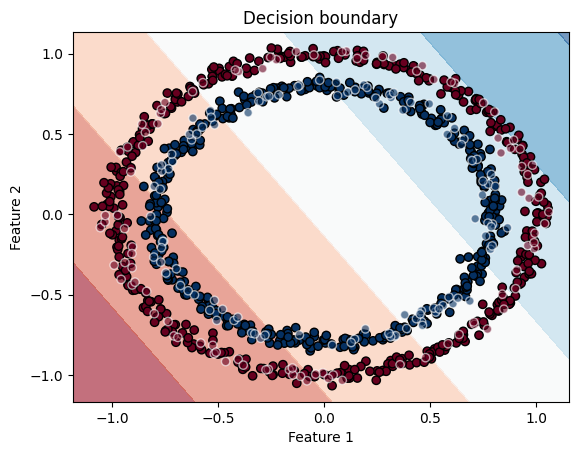

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a grid of points spanning the range of the input data
x1_min, x1_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
x2_min, x2_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
grid = torch.FloatTensor(np.c_[xx1.ravel(), xx2.ravel()]).to(device)

# Apply the trained model to the grid of points
model_0.eval()
with torch.no_grad():
    Z = model_0(grid).detach().cpu().numpy()

# Reshape the output into a grid
Z = Z.reshape(xx1.shape)

# Plot the decision regions
plt.contourf(xx1, xx2, Z, cmap=plt.cm.RdBu, alpha=0.6)

# Plot the training set
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='black')

# Plot the test set
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, edgecolor='white', alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision boundary')
plt.show()


In [ ]:
from sklearn.datasets import make_blobs

# Generate 1000 data points for 4 classes with 2 features
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)


In [ ]:
import torch
from sklearn.model_selection import train_test_split

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).long()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

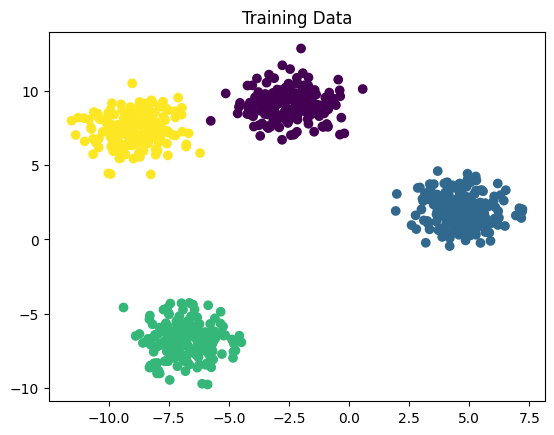

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Training Data')
plt.show()



In [ ]:
##nos données sont linéairement séparables

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class FCNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
      
        x = self.fc1(x)
        x = self.fc2(x)
        return x



In [ ]:
def calculate_accuracy(y_train, y_train_pred):
    # Convert the predicted probabilities to class labels
    _, predicted = torch.max(y_train_pred.data, 1)

    # Calculate the accuracy
    correct = (predicted == y_train).sum().item()
    total = len(y_train)
    accuracy = correct / total
    return accuracy

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# Définir les hyperparamètres
learning_rate = 0.01
num_epochs = 100


# Créer le modèle
model = FCNN(input_size=2, hidden_size=5, num_classes=4)

# Définir la fonction de perte et l'optimiseur
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)



# Entraîner le modèle
for epoch in range(num_epochs):
    # Calculer la prédiction du modèle et la perte
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
        
    # Mettre à jour les poids du modèle
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    # Évaluer le modèle toutes les 10 époques
    if (epoch+1) % 10 == 0:
        # Evaluer sur les données d'entraînement
        train_outputs = model(X_train)
        train_loss = loss_fn(train_outputs, y_train)
        train_acc =calculate_accuracy(y_train,train_outputs)
        # Evaluer sur les données de test
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_acc =calculate_accuracy(y_test,test_outputs)
        # Afficher les mesures de progression
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')


Epoch [10/100], Train Loss: 0.7733, Train Acc: 0.9213, Test Loss: 0.7606, Test Acc: 0.9100
Epoch [20/100], Train Loss: 0.5001, Train Acc: 0.9988, Test Loss: 0.4969, Test Acc: 1.0000
Epoch [30/100], Train Loss: 0.3779, Train Acc: 0.9988, Test Loss: 0.3780, Test Acc: 1.0000
Epoch [40/100], Train Loss: 0.3065, Train Acc: 0.9988, Test Loss: 0.3077, Test Acc: 1.0000
Epoch [50/100], Train Loss: 0.2586, Train Acc: 0.9988, Test Loss: 0.2604, Test Acc: 1.0000
Epoch [60/100], Train Loss: 0.2240, Train Acc: 0.9988, Test Loss: 0.2258, Test Acc: 1.0000
Epoch [70/100], Train Loss: 0.1975, Train Acc: 0.9988, Test Loss: 0.1993, Test Acc: 1.0000
Epoch [80/100], Train Loss: 0.1766, Train Acc: 0.9988, Test Loss: 0.1782, Test Acc: 1.0000
Epoch [90/100], Train Loss: 0.1596, Train Acc: 0.9988, Test Loss: 0.1610, Test Acc: 1.0000
Epoch [100/100], Train Loss: 0.1454, Train Acc: 0.9988, Test Loss: 0.1467, Test Acc: 1.0000


In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Définir les hyperparamètres
learning_rate = 0.01
num_epochs = 100


# Créer le modèle
model = FCNN(input_size=2, hidden_size=16, num_classes=4)

# Définir la fonction de perte et l'optimiseur
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Entraîner le modèle
for epoch in range(num_epochs):
    # Calculer la prédiction du modèle et la perte
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
        
    # Mettre à jour les poids du modèle
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    # Évaluer le modèle toutes les 10 époques
    if (epoch+1) % 10 == 0:
        # Evaluer sur les données d'entraînement
        train_outputs = model(X_train)
        train_loss = loss_fn(train_outputs, y_train)
        train_acc = calculate_accuracy(y_train, train_outputs)
        train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(y_train, torch.argmax(train_outputs, dim=1), average='weighted')
        train_cm = confusion_matrix(y_train, torch.argmax(train_outputs, dim=1))
        
        # Evaluer sur les données de test
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_acc = calculate_accuracy(y_test, test_outputs)
        test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test, torch.argmax(test_outputs, dim=1), average='weighted')
        test_cm = confusion_matrix(y_test, torch.argmax(test_outputs, dim=1))
        
        # Afficher les mesures de progression
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}, Train Confusion Matrix: \n{train_cm}')
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}, Test Recall: {test_recall:.4f}, Test F1: {test_f1:.4f}, Test Confusion Matrix: \n{test_cm}')


Epoch [10/100], Train Loss: 0.5528, Train Acc: 0.9888, Train Recall: 0.9888, Train F1: 0.9888, Train Confusion Matrix: 
[[197   0   0   4]
 [  5 204   0   0]
 [  0   0 197   0]
 [  0   0   0 193]]
Epoch [10/100], Test Loss: 0.5368, Test Acc: 0.9950, Test Recall: 0.9950, Test F1: 0.9950, Test Confusion Matrix: 
[[49  0  0  0]
 [ 1 40  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]
Epoch [20/100], Train Loss: 0.3490, Train Acc: 0.9975, Train Recall: 0.9975, Train F1: 0.9975, Train Confusion Matrix: 
[[200   0   0   1]
 [  1 208   0   0]
 [  0   0 197   0]
 [  0   0   0 193]]
Epoch [20/100], Test Loss: 0.3434, Test Acc: 0.9950, Test Recall: 0.9950, Test F1: 0.9950, Test Confusion Matrix: 
[[49  0  0  0]
 [ 1 40  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]
Epoch [30/100], Train Loss: 0.2662, Train Acc: 0.9975, Train Recall: 0.9975, Train F1: 0.9975, Train Confusion Matrix: 
[[200   0   0   1]
 [  1 208   0   0]
 [  0   0 197   0]
 [  0   0   0 193]]
Epoch [30/100], Test Loss: 0.2642, Test Acc: 1.0000, Test

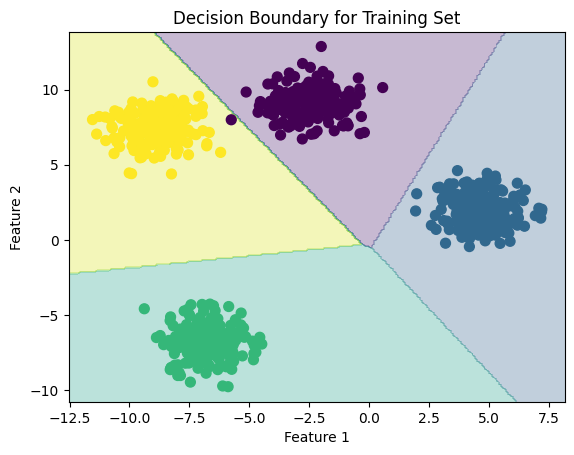

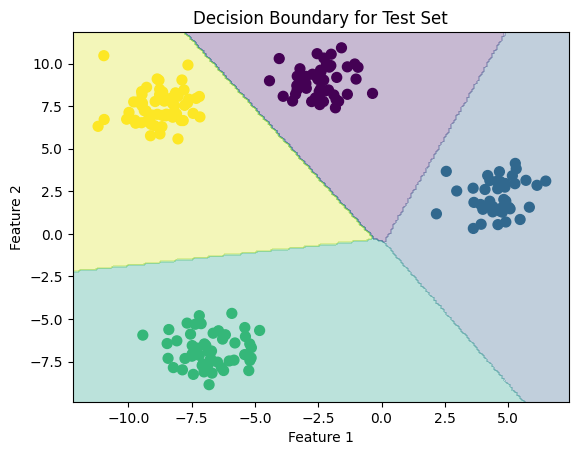

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot decision boundary for training set
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))
Z = np.argmax(Z.detach().numpy(), axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='viridis')
plt.title("Decision Boundary for Training Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Plot decision boundary for test set
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))
Z = np.argmax(Z.detach().numpy(), axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='viridis')
plt.title("Decision Boundary for Test Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
